Walter Thornton working with Dwayne Kennemore

# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model as lm
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [2]:
train_data = pd.read_csv(r'c://Users/wlt42/Downloads/dataset_1_train.txt', sep=",", header=0)
test_data = pd.read_csv(r'c://Users/wlt42/Downloads/dataset_1_test.txt', sep=",", header=0)


In [3]:
train_data.TimeMin = train_data.TimeMin / 1440
test_data.TimeMin = test_data.TimeMin / 1440


In [4]:
pd.options.display.max_rows = 400
train_data

,TimeMin,PickupCount
0,0.597222,33.0
1,0.011806,75.0
2,0.337500,13.0
3,0.208333,5.0
4,0.267361,10.0
5,0.443750,37.0
6,0.568750,28.0
7,0.613194,35.0
8,0.479167,27.0
9,0.047222,95.0



"The pattern of traffic looks reasonable to us. Dispersion is much greater in the early morning and late evenings / night time,
because there are more people randomly going places (versus staying at their office or home during the day. There's a big bump
during rush hour traffic (the period just before time 0.4 on the graph), for those taking cabs to work.

One thing we would like to see is the patterns broken out by *day of the week*, because we would expect travel patterns to
follow greater regularit when classified in that way, but that data has not been provided."


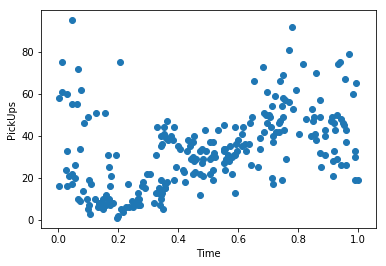

In [5]:
plt.scatter(train_data.TimeMin, train_data.PickupCount)
plt.xlabel('Time')
plt.ylabel('PickUps')
plt.show()

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

As n approaches k, the regression line will flatten as it approaches the mean of the dataset. 
Eventually becoming a horizontal line.

Generally, as k increases, the r^2 of both the test set and the training set will increase. At some point a maxima will occur,
and the test r^2 will decrease as overfitting occurs. The r^2 will continue to increase for the training set until it reaches 1, 
perfectly fitting the training data.
 R^2 of zero indicates that the model explains none of the variation in the data, while less than zero indicates worse performance.

In [6]:
# Numpify the data
X_train = ((np.array(train_data['TimeMin'])))
y_train = ((np.array(train_data['PickupCount'])))

X_test = ((np.array(test_data['TimeMin'])))
y_test = ((np.array(test_data['PickupCount'])))





In [7]:
# reshape the data
X_train_knn = X_train.reshape(len(X_train), 1)
X_train_knn = np.sort(X_train_knn, axis=0)

y_train_knn = y_train.reshape(len(y_train), 1)

y_test_knn = y_test.reshape(len(y_test), 1)

X_test_knn = X_test.reshape(len(X_test), 1)
X_test_knn = np.sort(X_test_knn, axis=0)

In [8]:
print(np.shape(X_train_knn), np.shape(y_train_knn), np.shape(y_test_knn), np.shape(X_test_knn))

(250, 1) (250, 1) (1000, 1) (1000, 1)


"The sklearn fit function applies a so-called training set of data to develop a numerical relationship for use for future
projections, by minimizing the sum of the squared errors between a "best fit" line and the actual data.

As can be seen in the plots below, when k is small, the prediction line is very jagged.

as k increases, the line gets more smooth, and when k=n, the regression is a completely flat line (beta = 0).

Some of the R-squared values are negative, which is a little counterintuitive because anything squared is a positive by
defintion. However, what it means here is that a flat line would be more predictive than the training data used. An r-squared of
0 would mean that there is no relationship between the regression and the underlying data.

As k increases, the training and test R-squareds converge to zero - but from different directions! The training R-squared is
positive while the test is negative, indicating poor "out of sample" performance."

When k is 1
The training R^2 is 0.749784, the testing R^2 is -1.016114
The training MSE is 89.120000, the testing MSE is 742.493000



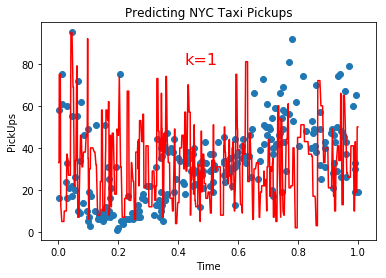

When k is 2
The training R^2 is 0.474082, the testing R^2 is -0.534401
The training MSE is 187.317000, the testing MSE is 565.088250



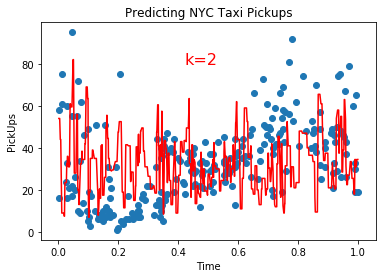

When k is 10
The training R^2 is 0.085648, the testing R^2 is -0.080383
The training MSE is 325.666160, the testing MSE is 397.882600



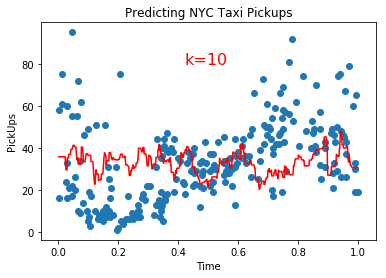

When k is 25
The training R^2 is 0.027876, the testing R^2 is -0.038418
The training MSE is 346.242976, the testing MSE is 382.427926



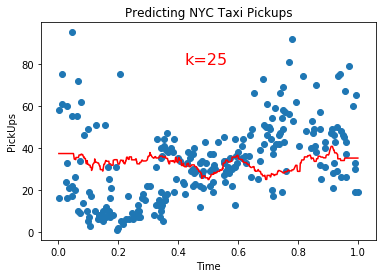

When k is 50
The training R^2 is 0.012775, the testing R^2 is -0.017918
The training MSE is 351.621347, the testing MSE is 374.878296



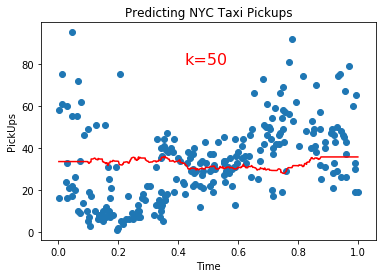

When k is 100
The training R^2 is 0.004554, the testing R^2 is -0.011010
The training MSE is 354.549491, the testing MSE is 372.334274



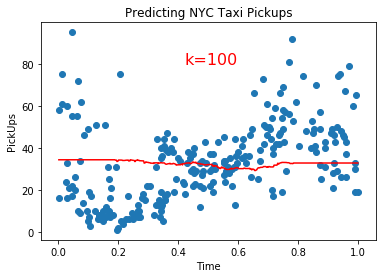

When k is 200
The training R^2 is -0.000400, the testing R^2 is -0.001550
The training MSE is 356.314138, the testing MSE is 368.850291



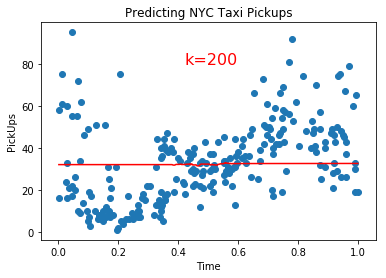

In [9]:
ks = [1, 2, 10, 25, 50, 100, 200]
i = 0
k_list = []
rtrain_list = []
rtest_list = []
for i, k in enumerate(ks):
    neigh = KNeighborsRegressor(n_neighbors = k)
    print("When k is %i" %k)

    # fit the model
    neigh.fit(X_train_knn, y_train_knn)

    # predict the response
    y_pred_knn = neigh.predict(X_test_knn)

    # evaluate accuracy
    rsquared_knn = neigh.score(X_test_knn, y_test_knn)
    rsquared_train_knn = neigh.score(X_train_knn, y_train_knn)
    print("The training R^2 is %2f, the testing R^2 is %2f" %(rsquared_train_knn, rsquared_knn))
    
    k_list.append(k)
    rtrain_list.append(rsquared_train_knn)
    rtest_list.append(rsquared_knn)
    
    
    
    # MSE
    train_mse_knn = mean_squared_error(y_train_knn, neigh.predict(X_train_knn))
    test_mse_knn = mean_squared_error(y_test_knn, y_pred_knn)
    print("The training MSE is %2f, the testing MSE is %2f\n" %(train_mse_knn, test_mse_knn))

    # Build graph
    plt.scatter(train_data.TimeMin, train_data.PickupCount)
    #plt.scatter(X_train, y_train, color="grey", alpha = .25)
    plt.plot(X_test_knn, y_pred_knn, color="red")
    plt.xlabel('Time')
    plt.ylabel('PickUps')
    plt.title('Predicting NYC Taxi Pickups')
    plt.annotate("k=%i"% ks[i], xy=(.42, 80), fontsize = 16, color = 'red')
    plt.show()

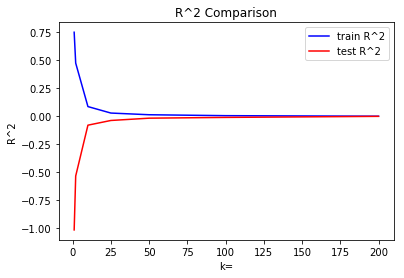

In [10]:

plt.plot(k_list, rtrain_list, color="blue", label='train R^2')
plt.plot(k_list, rtest_list, color="red", label='test R^2')
plt.xlabel('k=')
plt.ylabel('R^2')
plt.title('R^2 Comparison')
plt.axis('tight')
plt.legend(loc='best')

plt.show()

"The R-squared value in the K-NN regression converges to 0. The R-squared in the linear regression is 0 as well.

Because the confidence interval for the beta spans from a negative value to a positive value, I consider zero a reliable
estimate of R-squared. as it is no better than a flat line, the negative adjusted R-squared makes sense.

The y-intercept ranges from [28.5, 37.8], so is significantly different from 0.

A 99% confidence interval for the slope and intercept will be wider then the 95% interval, because the multiplier is greater."


# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [11]:
# Add constant to create additional matrix of ones
X_train_sm = sm.add_constant(X_train_knn)

# ordinary least squares 
regress_sm = sm.OLS(y_train_knn, X_train_sm)

# save regression info in results_sm
results_sm = regress_sm.fit()

# get the beta parameters from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]


In [12]:
print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))

(beta0, beta1) = (33.158163, -0.776365)


In [13]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.03377
Date:                Wed, 27 Sep 2017   Prob (F-statistic):              0.854
Time:                        23:21:03   Log-Likelihood:                -1089.1
No. Observations:                 250   AIC:                             2182.
Df Residuals:                     248   BIC:                             2189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1582      2.381     13.924      0.0

In [14]:
confidence = results_sm.conf_int()

In [21]:
print("The confidence interval for the slope is {}".format(confidence[1]))
print("The confidence interval for the intercept is {}".format(confidence[0]))
print("The training R^2 value is %.2f"%results_sm.rsquared)

pred_sm = lambda x: beta0_sm * x + beta1_sm

rsquared_train_sm = r2_score(y_test_knn, pred_sm(X_test_knn))
print("The test R^2 value is %.2f"%rsquared_train_sm)

The confidence interval for the slope is [-9.09770469  7.54497428]
The confidence interval for the intercept is [ 28.46779435  37.848532  ]
The training R^2 value is 0.00
The test R^2 value is -1.07


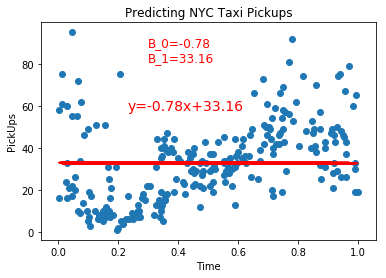

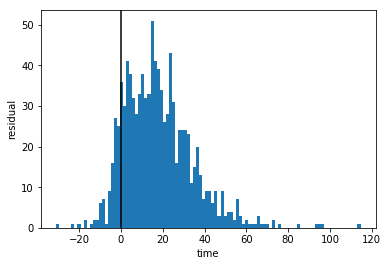

In [24]:
plt.scatter(train_data.TimeMin, train_data.PickupCount) 
#plt.scatter(X_train, y_train, alpha = .25, color = 'red')
plt.plot(X_train, results_sm.fittedvalues, color = 'red')
plt.xlabel('Time')
plt.ylabel('PickUps')
plt.title('Predicting NYC Taxi Pickups')
plt.annotate("B_0=%.2f\nB_1=%.2f\n\n"%(beta1_sm, beta0_sm), xy=(.3, 67), fontsize = 12, color = 'red')
plt.annotate("y=%.2fx+%.2f"%(beta1_sm, beta0_sm), xy=(.23, 58), fontsize = 14, color = 'red')
plt.show()
#plt.add_axes((.1,.1,.8,.2)) 

# Residual plot
plt.hist(y_test - pred_sm(X_test), bins=100)
plt.axvline(x=0, color = "black")
plt.ylabel('residual')
plt.xlabel('time')
plt.show()

Based on the skew of the residuals, as well as a common sense visual inspection, the data is not best modelled by a linear function

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

betas of degrees = 2
[[  0.         -20.47982199  19.74486244]]


Mean squared error: 370.35
Testing Rsquared is -0.01


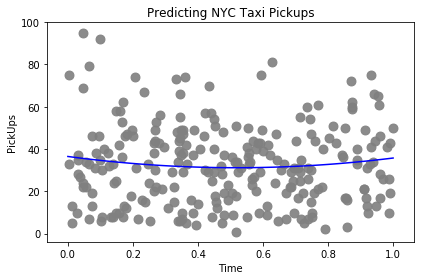

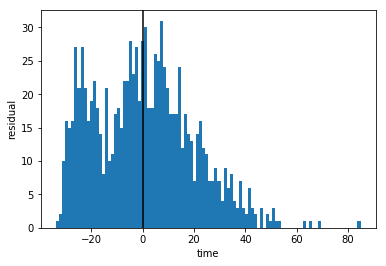

betas of degrees = 3
[[  0.          16.4761273  -72.87030035  61.7608178 ]]


Mean squared error: 372.22
Testing Rsquared is -0.01


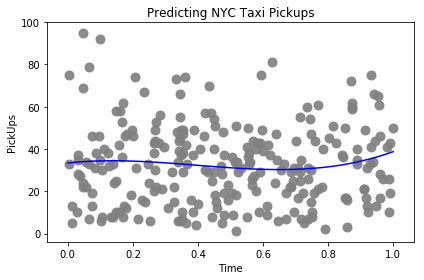

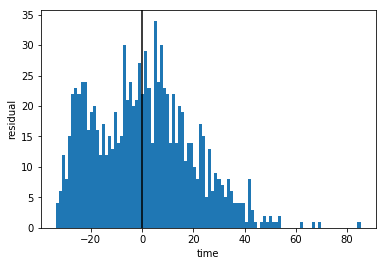

betas of degrees = 10
[[  0.00000000e+00   2.95480449e+01   1.64953186e+03  -4.56984480e+04
    4.20700568e+05  -1.94375384e+06   5.12491697e+06  -8.06014021e+06
    7.48278599e+06  -3.78425957e+06   8.03772629e+05]]


Mean squared error: 378.48
Testing Rsquared is -0.03


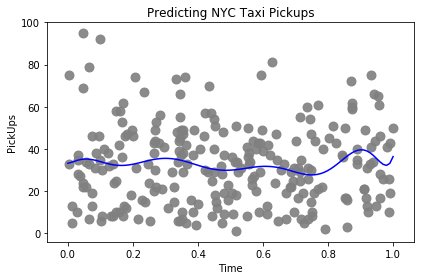

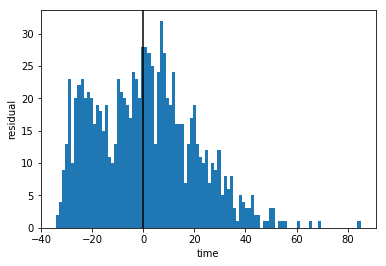

betas of degrees = 25
[[  4.21503512e+12  -1.38394524e+04   9.46612533e+05  -3.15619184e+07
    6.38649447e+08  -8.71414609e+09   8.47729776e+10  -6.06608258e+11
    3.24936348e+12  -1.31355342e+13   4.00340426e+13  -9.07658316e+13
    1.47548210e+14  -1.55515915e+14   6.76286633e+13   6.90942245e+13
   -1.19973574e+14   2.46719752e+13   9.45781367e+13  -8.43309008e+13
   -3.27363356e+13   1.13781788e+14  -9.89698129e+13   4.54218730e+13
   -1.12380826e+13   1.18765129e+12]]


Mean squared error: 397.10
Testing Rsquared is -0.08


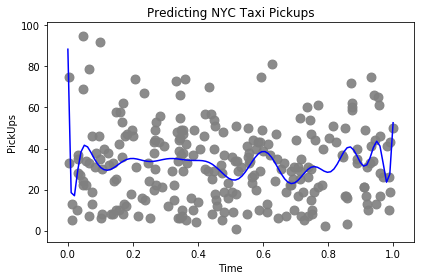

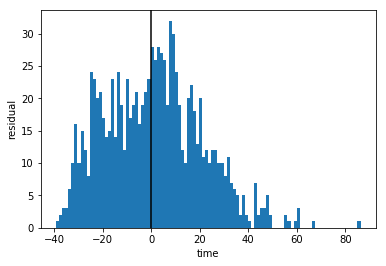

betas of degrees = 50
[[ -2.34803876e+15  -2.86117871e+04   2.47134846e+06  -9.16714841e+07
    1.89288836e+09  -2.42859893e+10   2.00887166e+11  -1.03826626e+12
    2.65086739e+12   4.05432336e+12  -6.56185229e+13   2.83397261e+14
   -6.85018120e+14   9.23816007e+14  -4.01855297e+14  -6.28542722e+14
    6.83383891e+14   5.02031515e+14  -6.71734380e+14  -5.87413813e+14
    3.67911930e+14   8.10180228e+14   1.18167282e+14  -7.25109403e+14
   -6.31810151e+14   7.31518906e+13   8.08161265e+14   6.05572613e+14
   -1.26029516e+14  -6.95615428e+14  -7.48659462e+14  -7.35635598e+13
    7.20201130e+14   8.07979320e+14   2.22730137e+14  -4.03147390e+14
   -8.57557470e+14  -5.40262955e+14   1.68926995e+14   7.60262292e+14
    7.91590746e+14   9.50031080e+13  -7.71256651e+14  -8.66364362e+14
   -1.37446417e+14   8.50321220e+14   9.21439823e+14  -5.01343285e+14
   -1.27653159e+15   1.14394880e+15  -2.69142289e+14]]


Mean squared error: 826.58
Testing Rsquared is -1.24


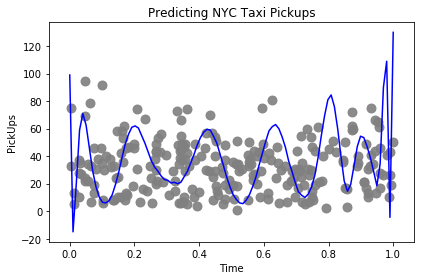

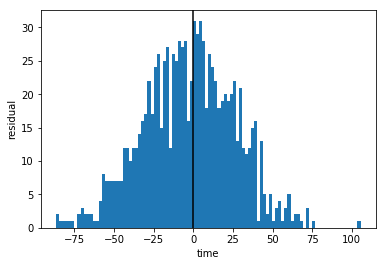

In [25]:
degrees = [2, 3, 10, 25, 50]
i = 0

for i, deg in enumerate(degrees):

    #plt.clf()
    
    # PolynomialFeatures
    poly = PolynomialFeatures(degree=deg)
    X_train_pr = poly.fit_transform(X_train_knn)
    X_test_pr = poly.fit_transform(X_test_knn)

    # Create instance
    lg = lm.LinearRegression(fit_intercept = True)

    # Fit to transformed data
    lg.fit(X_train_pr, y_train_knn)

    # Get Parameters
    params = lg.coef_

    # Predict
    y_train_pred = lg.predict(X_train_pr)
    y_test_pred = lg.predict(X_test_pr)

    # Print the parameters
    print("betas of degrees =", deg)
    print(params)
    print("\n")
    
    # The mean squared error
    print("Mean squared error: %.2f"% mean_squared_error(y_test_knn, y_test_pred))

    # R^2
    print('Testing Rsquared is %.2f'% r2_score(y_test_knn, y_test_pred))
    
    # Plot
    
    X_general = np.linspace(0,1, 100).reshape(-1,1)
    X_general_with_poly = poly.fit_transform(X_general)
    y_general = lg.predict(X_general_with_poly)
    
    
    
    plt.plot(X_general, y_general, 'b-' );
    plt.scatter(X_train_knn, y_train_knn, color='gray', alpha=0.91, s=80)
   
    plt.xlabel('Time')
    plt.ylabel('PickUps')
    plt.title('Predicting NYC Taxi Pickups')
    plt.tight_layout()
    
    
    plt.show()
    
    # Residual plot
    plt.hist(y_test_knn - y_test_pred, bins=100)
    plt.axvline(x=0, color = "black")
    plt.ylabel('residual')
    plt.xlabel('time')
    plt.show()
    

In [ ]:
The increase in polynomial terms seem to normalized the residuals

I think that the best of these models is polynomial regression of two degrees. It has the highest testing rsquared score of all the models. Anymore than three terms and we seem to run into serious overfitting as the rsquared scores on the test data drop. The same occurs with knn regression as k increases. These models seem to leave much wanting if real prediction is wanted. To improve, I would add an additional predictor to the model.

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [ ]:
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])

#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).